# Chicago Crime Data - Part 1

- Robert Yonce
- 6/7/23


Questions 3 and 5 are incomplete but working on them

# Import File

In [37]:
# Import set options

import pandas as pd
import os,glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import holidays
import datetime as dt
from holidays import country_holidays
import matplotlib.dates as mdates
from datetime import datetime

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [2]:
# File location

OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [3]:
# Full file

# Get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
chicago_full = pd.concat([pd.read_csv(f) for f in crime_files])
chicago_full

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.00,NaN,41.76,-87.64
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.00,NaN,41.85,-87.70
2,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.00,NaN,41.77,-87.62
3,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
4,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.00,18.00,41.74,-87.69
...,...,...,...,...,...,...,...,...,...,...,...,...
100405,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.00,33.00,41.95,-87.71
100406,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.00,9.00,41.68,-87.62
100407,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.00,36.00,41.94,-87.79
100408,13090346,05/30/2023 12:55:00 PM,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1913,19.00,46.00,41.96,-87.66


# Change for Analysis

In [4]:
# Explicitly setting the format to speed up pd.to_datetime

date_format = "%m/%d/%Y %H:%M:%S %p"

In [5]:
# Converting to Datetime

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2001-01-01 01:00:00,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.00,NaN,41.76,-87.64
2001-01-01 01:00:00,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.00,NaN,41.80,-87.61
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
2001-01-01 01:00:00,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.00,NaN,41.96,-87.75
2001-01-01 01:00:00,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.00,NaN,41.90,-87.67
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 12:48:00,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.00,33.00,41.95,-87.71
2023-05-30 12:50:00,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.00,9.00,41.68,-87.62
2023-05-30 12:52:00,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.00,36.00,41.94,-87.79


In [6]:
# Dropping columns don't need

chicago_full.drop(columns = ['ID', 'Latitude', 'Longitude', 'Arrest', 
                             'Domestic', 'Location Description', 'Description'], inplace = True)
chicago_full

,Date,Primary Type,Beat,District,Ward
Datetime,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,621,6.00,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,ASSAULT,223,2.00,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,1913,19.00,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,1624,16.00,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,ASSAULT,1322,12.00,NaN
...,...,...,...,...,...
2023-05-30 12:48:00,05/30/2023 12:48:00 PM,THEFT,1733,17.00,33.00
2023-05-30 12:50:00,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,522,5.00,9.00
2023-05-30 12:52:00,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,2511,25.00,36.00


In [7]:
chicago_full['Total_Incidents'] = 1
chicago_full['Year'] = chicago_full.index.year
chicago_full['Month'] = chicago_full.index.month
chicago_full['MonthName'] = chicago_full.index.month_name()
chicago_full['HourofDay']  = chicago_full.index.hour
chicago_full

,Date,Primary Type,Beat,District,Ward,Total_Incidents,Year,Month,MonthName,HourofDay
Datetime,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,621,6.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,ASSAULT,223,2.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,1913,19.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,1624,16.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,ASSAULT,1322,12.00,NaN,1,2001,1,January,1
...,...,...,...,...,...,...,...,...,...,...
2023-05-30 12:48:00,05/30/2023 12:48:00 PM,THEFT,1733,17.00,33.00,1,2023,5,May,12
2023-05-30 12:50:00,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,522,5.00,9.00,1,2023,5,May,12
2023-05-30 12:52:00,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,2511,25.00,36.00,1,2023,5,May,12


# Questions

## 1) Comparing Police Districts: Which district has the most crimes? Which has the least?

In [8]:
district = chicago_full['District'].value_counts(ascending = False)
district

8.00     524945
11.00    501255
6.00     456881
7.00     451604
25.00    444467
4.00     443514
3.00     396210
12.00    387286
9.00     381633
2.00     369886
19.00    350749
18.00    350645
5.00     346173
10.00    336583
15.00    334708
1.00     316057
14.00    302237
16.00    261552
22.00    256059
24.00    236030
17.00    225505
20.00    138186
31.00       242
21.00         4
Name: District, dtype: int64

- District 8 has the most crimes with 524,945

- District 21 has the least with 4

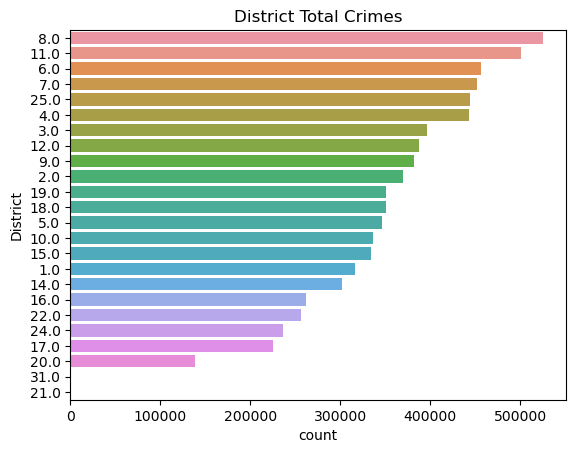

In [9]:
# Visual of numbers

ax = sns.countplot(data=chicago_full, y='District', order = district.index)
ax.set(title = 'District Total Crimes');

# Questions with Time

## 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?

- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [10]:
# Count of Crimes through the years

vis_df = chicago_full['Year'].value_counts().sort_index(ascending = True)
vis_df

2001    485882
2002    486804
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336265
2013    307471
2014    275738
2015    264764
2016    269799
2017    269082
2018    268790
2019    261269
2020    212132
2021    208633
2022    238530
2023    100410
Name: Year, dtype: int64

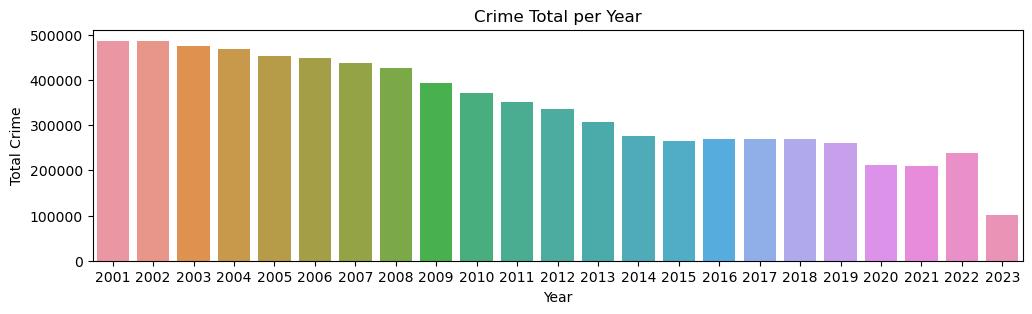

In [11]:
# Visualizing Crime through the years

fig, ax = plt.subplots(figsize=(12,3))
ax = sns.countplot(data=chicago_full, x='Year')

ax.set(title = 'Crime Total per Year', xlabel = 'Year', ylabel = 'Total Crime');

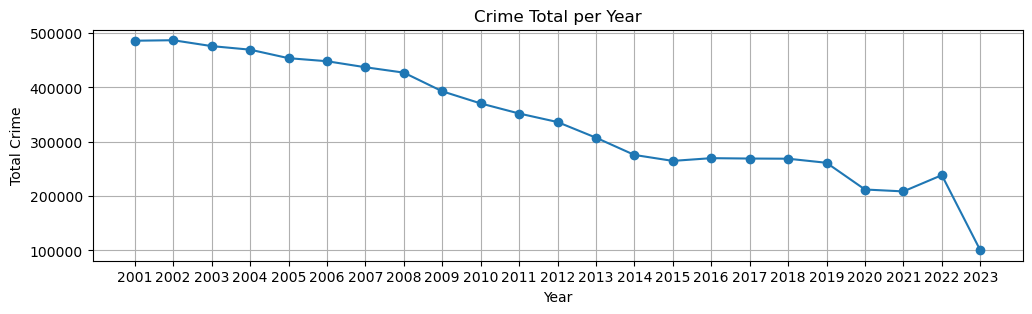

In [12]:
# Graph with Scatter

vis_df = chicago_full['Year'].value_counts().sort_index()


fig, ax = plt.subplots(figsize=(12,3))
ax = vis_df.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year',xticks=vis_df.index)
ax.set(title = 'Crime Total per Year', xlabel = 'Year', ylabel = 'Total Crime');

### Is the total number of crimes increasing or decreasing across the years?

    - Through the years, crime overall has decreased.

In [13]:
# Get # of crimes by Year

crimes_by_year = chicago_full.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
                   2023    3487
Name: Year, Length: 720, dtype: int64

In [14]:
# Convert to dataframe and reset_index()

plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8766


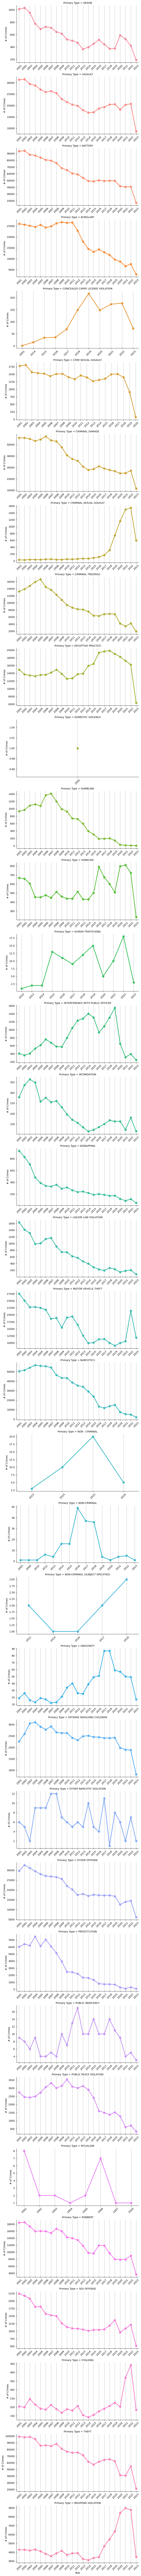

In [16]:
# Each Crime through the year graphed

g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=1,
               sharey=False, sharex=False)

g.set_xticklabels(rotation = 45)
g.fig.tight_layout()

[ax.grid(axis='x') for ax in g.axes];


### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?


- Crime INCREASING through the years while overall crime is decreasing: 
    
    Concealed Carry License Violation, Criminal Sexual Assault, Deceptive Practice, Human Trafficking, Interference with Public Officer, Non-Criminal, Stalking, Weapons Violation.
     
     
- Crime that has remained steady through the years:
    
    Homicide.
    
    
- Crime that has gone up and down through the years:

    Non-Criminal, Other Narcotic Violation, Obscenity, Public Indecency, Ritualism, 
    

## 3) Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
- You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
- You can consider any crime that occurred between 4 -7 PM as PM rush hour.
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [22]:
rush = chicago_full
rush

,Date,Primary Type,Beat,District,Ward,Total_Incidents,Year,Month,MonthName,HourofDay
Datetime,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,621,6.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,ASSAULT,223,2.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,1913,19.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,1624,16.00,NaN,1,2001,1,January,1
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,ASSAULT,1322,12.00,NaN,1,2001,1,January,1
...,...,...,...,...,...,...,...,...,...,...
2023-05-30 12:48:00,05/30/2023 12:48:00 PM,THEFT,1733,17.00,33.00,1,2023,5,May,12
2023-05-30 12:50:00,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,522,5.00,9.00,1,2023,5,May,12
2023-05-30 12:52:00,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,2511,25.00,36.00,1,2023,5,May,12


KeyError: '01/01/2001 01:00:00 AM'

In [ ]:
# Bins for rush zones

bins = [0, 7, 11, 16, 20, np.inf]
names = np.array(['non', 'rush_am', 'non', 'rush_pm', 'non'])
rush['Rush_Zone'] = names[np.searchsorted(bins, df['HourofDay'])-1]

## 4) Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [17]:
# Count of Crimes through the months

month_df = chicago_full['MonthName'].value_counts(ascending = True)
month_df

February     547550
December     579658
November     608879
January      621988
April        647393
March        650051
September    668162
October      676182
June         681678
May          703414
August       710349
July         717154
Name: MonthName, dtype: int64

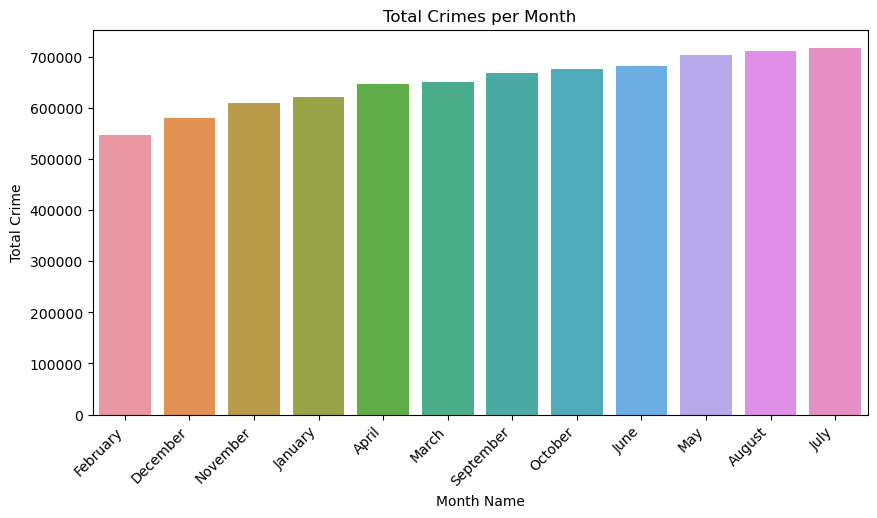

In [18]:
# Graph by months

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=chicago_full, x='MonthName',order=month_df.index);

ax.set(title = 'Total Crimes per Month', xlabel = 'Month Name', ylabel = 'Total Crime')

# Rotate xtick labels and align the text to the bar

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### What months have the most crime? What months have the least?

- The Top 2 months are July and August

- The Bottom 2 months are February and December

In [19]:
# Get # of crimes by Year

crimes_by_month = chicago_full.groupby('Primary Type')['MonthName'].value_counts().sort_index()
crimes_by_month

Primary Type       MonthName
ARSON              April         1134
                   August        1182
                   December       923
                   February       840
                   January        963
                                ...  
WEAPONS VIOLATION  March         8801
                   May          10725
                   November      7952
                   October       9190
                   September     9435
Name: MonthName, Length: 415, dtype: int64

In [20]:
# Convert to dataframe and reset_index()

plot_month = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_month

,Primary Type,MonthName,# of Crimes
0,ARSON,April,1134
1,ARSON,August,1182
2,ARSON,December,923
3,ARSON,February,840
4,ARSON,January,963
...,...,...,...
410,WEAPONS VIOLATION,March,8801
411,WEAPONS VIOLATION,May,10725
412,WEAPONS VIOLATION,November,7952
413,WEAPONS VIOLATION,October,9190


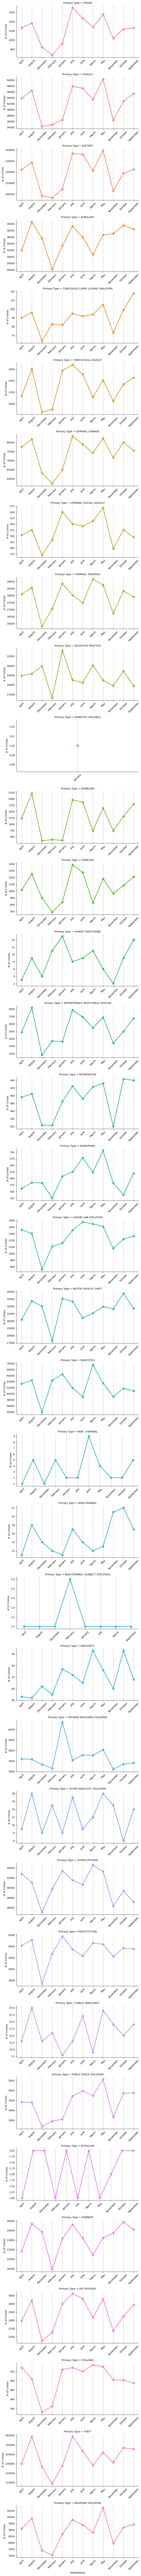

In [21]:
# Each Crime through the month graphed

g = sns.catplot(data=plot_month, x='MonthName', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=1,
               sharey=False, sharex=False)
g.set_xticklabels(rotation = 45)
g.fig.tight_layout()

[ax.grid(axis='x') for ax in g.axes];

### Are there any individual crimes that do not follow this pattern? If so, which crimes?

- Crime that was NOT consistent with the lowest months BOTH in December and February: 
    
    Human Trafficking, Non-Criminal, Obscenity, Other Narcotic Violation, Public Indecency. 
    
    
- Crime that was NOT consistent with the Top months BOTH in July and August: 

    Concealed Carry License Violation, Criminal Sexual Assault, Criminal Trespass, Human Trafficking, Intimidation, Kidnapping, Liquor Law Violation, Motor Vehicle Theft, Narcotics, Non-Criminal, Obscenity, Offense Involving Children, Other Offense, Public Peace Violation, Stalking.
    
    
- There were very few that following the path of the Top Months

## 5) Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?